In [2]:
!nvidia-smi

Sat Oct  1 05:34:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.60.02    Driver Version: 510.60.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4000    On   | 00000000:01:00.0 Off |                  Off |
| 41%   29C    P8    15W / 140W |      5MiB / 16376MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA RTX A4000    On   | 00000000:25:00.0 Off |                  Off |
| 41%   

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

In [21]:
transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root="./data", train=True,
                                       download=True, transform=transform)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root="./data", train = False,
                                      download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ("plane", "car", "bird", "cat",
           "deer", "dog", "frog", "horse", "ship", "truck")


Files already downloaded and verified
Files already downloaded and verified


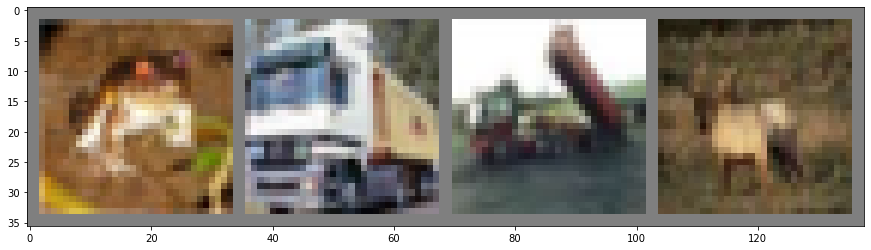

frog  truck truck deer 


In [22]:
import matplotlib.pyplot as plt
import numpy as np

# fucntion to show an image

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(15,5))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
    
# get some random training images

dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images
imshow(torchvision.utils.make_grid(images))

#print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


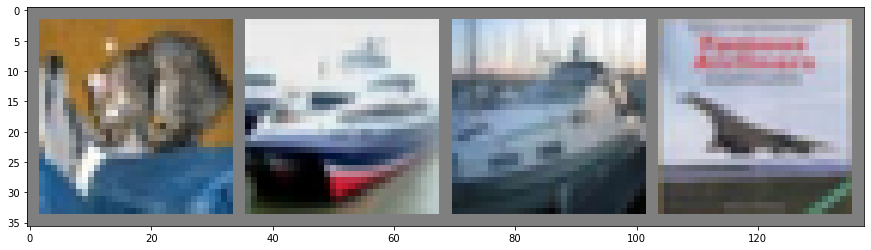

GroundTruth:  cat   ship  ship  plane


In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [1]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 50

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
def train_accuracy(model):

    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

#         print('Accuracy of the network on the {} train images: {} %'.format(50000, 100 * correct / total))
    return 100 * correct / total


In [4]:
def test_accuracy(model):
    
    with torch.no_grad():
    
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

#         print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))
    return 100 * correct / total

## Training models with Configuration 1

## Model A

In [100]:
# Creating a CNN class
class ConvNeuralNet_A(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_A, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.fc1 = nn.Linear(17*17*24, num_classes)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
#         out = self.relu1(out)
#         out = self.fc2(out)
        return out

In [101]:
model_A = ConvNeuralNet_A(num_classes)
model_A.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_A.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.1448
Epoch [2/50], Loss: 1.0176
Epoch [3/50], Loss: 1.0958
Epoch [4/50], Loss: 1.4455
Epoch [5/50], Loss: 1.4039
Epoch [6/50], Loss: 1.3580
Epoch [7/50], Loss: 0.8527
Epoch [8/50], Loss: 1.3694
Epoch [9/50], Loss: 1.4761
Epoch [10/50], Loss: 1.2155
Epoch [11/50], Loss: 1.4571
Epoch [12/50], Loss: 0.6576
Epoch [13/50], Loss: 1.9499
Epoch [14/50], Loss: 1.3246
Epoch [15/50], Loss: 1.5172
Epoch [16/50], Loss: 1.2378
Epoch [17/50], Loss: 1.2541
Epoch [18/50], Loss: 0.8955
Epoch [19/50], Loss: 1.5671
Epoch [20/50], Loss: 0.6944
Epoch [21/50], Loss: 1.2069
Epoch [22/50], Loss: 0.7898
Epoch [23/50], Loss: 1.1067
Epoch [24/50], Loss: 1.2406
Epoch [25/50], Loss: 0.9595
Epoch [26/50], Loss: 0.8956
Epoch [27/50], Loss: 1.7134
Epoch [28/50], Loss: 1.5611
Epoch [29/50], Loss: 1.3486
Epoch [30/50], Loss: 1.8616
Epoch [31/50], Loss: 1.3745
Epoch [32/50], Loss: 1.5243
Epoch [33/50], Loss: 1.3056
Epoch [34/50], Loss: 1.2032
Epoch [35/50], Loss: 1.0216
Epoch [36/50], Loss: 1.1136
E

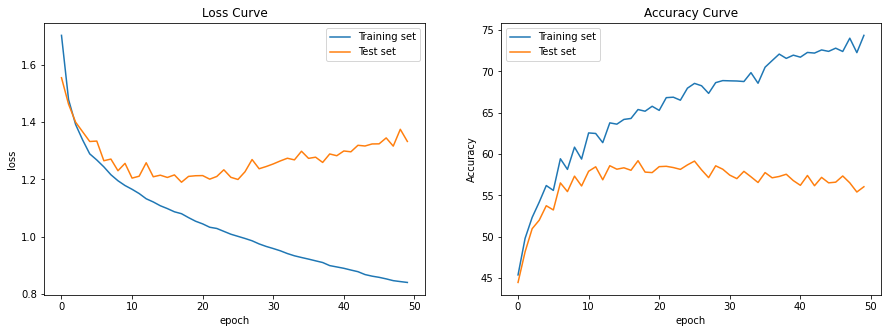

In [102]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_A))
    A_test.append(test_accuracy(model_A))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("model_A.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [19]:
model_A.modules

<bound method Module.modules of ConvNeuralNet_A(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2904, out_features=10, bias=True)
)>

### Model B

In [104]:
# Creating a CNN class
class ConvNeuralNet_B(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_B, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [105]:
model_B = ConvNeuralNet_B(num_classes)
model_B.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_B.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [106]:
# # We use the pre-defined number of epochs to determine how many iterations to train the network on
# for epoch in range(num_epochs):
# 	#Load in the data in batches using the train_loader object
#     for i, (images, labels) in enumerate(train_loader):  
#         # Move tensors to the configured device
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # Forward pass
#         outputs = model_B(images)
#         loss = criterion(outputs, labels)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/50], Loss: 1.7983
Epoch [2/50], Loss: 2.0820
Epoch [3/50], Loss: 1.1793
Epoch [4/50], Loss: 1.2244
Epoch [5/50], Loss: 1.5258
Epoch [6/50], Loss: 0.8974
Epoch [7/50], Loss: 0.7618
Epoch [8/50], Loss: 0.6551
Epoch [9/50], Loss: 1.4251
Epoch [10/50], Loss: 0.9695
Epoch [11/50], Loss: 1.2931
Epoch [12/50], Loss: 0.8527
Epoch [13/50], Loss: 0.6479
Epoch [14/50], Loss: 0.8924
Epoch [15/50], Loss: 0.7110
Epoch [16/50], Loss: 0.8918
Epoch [17/50], Loss: 0.3279
Epoch [18/50], Loss: 0.9737
Epoch [19/50], Loss: 1.1255
Epoch [20/50], Loss: 0.8618
Epoch [21/50], Loss: 0.8818
Epoch [22/50], Loss: 0.2105
Epoch [23/50], Loss: 0.8834
Epoch [24/50], Loss: 0.7210
Epoch [25/50], Loss: 1.3678
Epoch [26/50], Loss: 0.9883
Epoch [27/50], Loss: 0.6160
Epoch [28/50], Loss: 1.7218
Epoch [29/50], Loss: 1.0705
Epoch [30/50], Loss: 1.0815
Epoch [31/50], Loss: 2.0309
Epoch [32/50], Loss: 1.5084
Epoch [33/50], Loss: 0.6959
Epoch [34/50], Loss: 1.4970
Epoch [35/50], Loss: 0.9302
Epoch [36/50], Loss: 0.7432
E

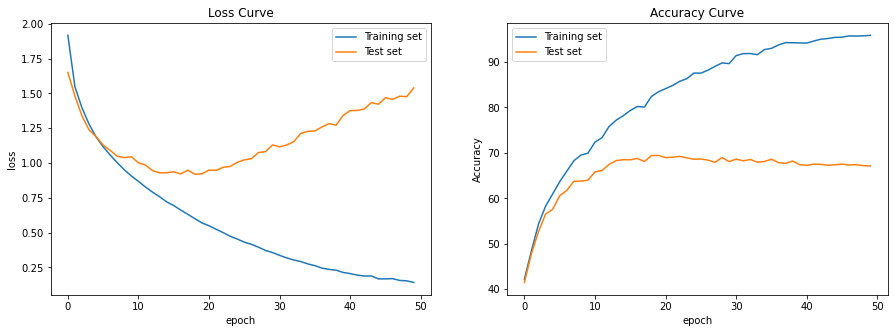

In [107]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_B))
    A_test.append(test_accuracy(model_B))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("model_B.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [54]:
model_B.modules

<bound method Module.modules of ConvNeuralNet_B(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

In [ ]:
model.sum

### Model C

In [108]:
# Creating a CNN class
class ConvNeuralNet_C(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_C, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 2, stride = 1)
        self.fc1 = nn.Linear(17*17*24, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [109]:
model_C = ConvNeuralNet_C(num_classes)
model_C.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_C.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.6737
Epoch [2/50], Loss: 1.3655
Epoch [3/50], Loss: 1.2144
Epoch [4/50], Loss: 1.7027
Epoch [5/50], Loss: 1.3546
Epoch [6/50], Loss: 1.0872
Epoch [7/50], Loss: 1.3264
Epoch [8/50], Loss: 0.8065
Epoch [9/50], Loss: 1.1487
Epoch [10/50], Loss: 1.2030
Epoch [11/50], Loss: 0.5346
Epoch [12/50], Loss: 1.4901
Epoch [13/50], Loss: 1.0289
Epoch [14/50], Loss: 1.1648
Epoch [15/50], Loss: 0.8375
Epoch [16/50], Loss: 0.6406
Epoch [17/50], Loss: 1.3915
Epoch [18/50], Loss: 1.4511
Epoch [19/50], Loss: 0.7517
Epoch [20/50], Loss: 0.5016
Epoch [21/50], Loss: 1.6189
Epoch [22/50], Loss: 0.8010
Epoch [23/50], Loss: 2.4606
Epoch [24/50], Loss: 1.6286
Epoch [25/50], Loss: 1.9067
Epoch [26/50], Loss: 1.3961
Epoch [27/50], Loss: 2.0816
Epoch [28/50], Loss: 0.7161
Epoch [29/50], Loss: 2.8109
Epoch [30/50], Loss: 0.7235
Epoch [31/50], Loss: 0.9724
Epoch [32/50], Loss: 1.3268
Epoch [33/50], Loss: 2.6305
Epoch [34/50], Loss: 2.8708
Epoch [35/50], Loss: 1.1654
Epoch [36/50], Loss: 2.1185
E

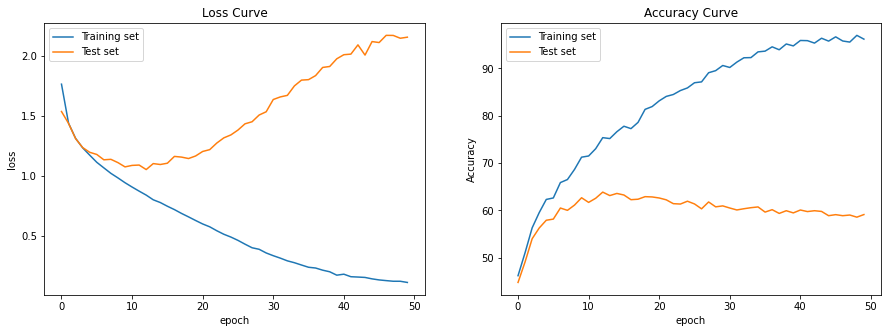

In [110]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_C))
    A_test.append(test_accuracy(model_C))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("model_C.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))


In [111]:
model_C.modules

<bound method Module.modules of ConvNeuralNet_C(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6936, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

# Training MOdels with Configuration 2

## Model A

In [5]:
# Creating a CNN class
class ConvNeuralNet_A(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_A, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        self.fc1 = nn.Linear(14*14*24, num_classes)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
#         out = self.relu1(out)
#         out = self.fc2(out)
        return out

In [6]:
model_A = ConvNeuralNet_A(num_classes)
model_A.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_A.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.4306
Epoch [2/50], Loss: 1.5088
Epoch [3/50], Loss: 1.9421
Epoch [4/50], Loss: 0.8221
Epoch [5/50], Loss: 1.3556
Epoch [6/50], Loss: 1.6585
Epoch [7/50], Loss: 1.2773
Epoch [8/50], Loss: 1.3795
Epoch [9/50], Loss: 1.1067
Epoch [10/50], Loss: 1.2511
Epoch [11/50], Loss: 1.2936
Epoch [12/50], Loss: 0.8167
Epoch [13/50], Loss: 1.5472
Epoch [14/50], Loss: 1.2183
Epoch [15/50], Loss: 1.1743
Epoch [16/50], Loss: 1.8342
Epoch [17/50], Loss: 1.2800
Epoch [18/50], Loss: 0.7205
Epoch [19/50], Loss: 0.6479
Epoch [20/50], Loss: 0.9663
Epoch [21/50], Loss: 1.1998
Epoch [22/50], Loss: 1.2911
Epoch [23/50], Loss: 0.8246
Epoch [24/50], Loss: 1.2561
Epoch [25/50], Loss: 0.8116
Epoch [26/50], Loss: 0.8385
Epoch [27/50], Loss: 1.2628
Epoch [28/50], Loss: 1.2483
Epoch [29/50], Loss: 0.8242
Epoch [30/50], Loss: 1.0680
Epoch [31/50], Loss: 1.1355
Epoch [32/50], Loss: 1.5517
Epoch [33/50], Loss: 0.8668
Epoch [34/50], Loss: 0.7979
Epoch [35/50], Loss: 0.9515
Epoch [36/50], Loss: 1.3050
E

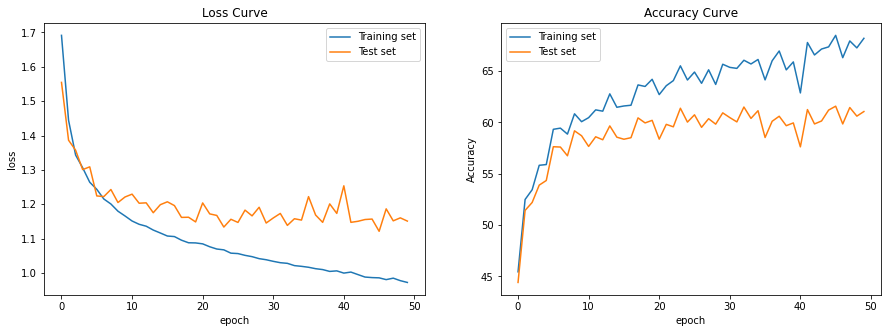

In [7]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_A))
    A_test.append(test_accuracy(model_A))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config2_model_A.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [8]:
model_A.modules

<bound method Module.modules of ConvNeuralNet_A(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4704, out_features=10, bias=True)
)>

### Model B

In [9]:
# Creating a CNN class
class ConvNeuralNet_B(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_B, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        
        self.fc1 = nn.Linear(20*20*64, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [10]:
model_B = ConvNeuralNet_B(num_classes)
model_B.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_B.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [11]:
# # We use the pre-defined number of epochs to determine how many iterations to train the network on
# for epoch in range(num_epochs):
# 	#Load in the data in batches using the train_loader object
#     for i, (images, labels) in enumerate(train_loader):  
#         # Move tensors to the configured device
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # Forward pass
#         outputs = model_B(images)
#         loss = criterion(outputs, labels)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/50], Loss: 1.4714
Epoch [2/50], Loss: 0.8857
Epoch [3/50], Loss: 1.1961
Epoch [4/50], Loss: 0.8879
Epoch [5/50], Loss: 0.8457
Epoch [6/50], Loss: 0.6881
Epoch [7/50], Loss: 0.6236
Epoch [8/50], Loss: 0.3237
Epoch [9/50], Loss: 0.9342
Epoch [10/50], Loss: 1.0907
Epoch [11/50], Loss: 0.3305
Epoch [12/50], Loss: 0.9047
Epoch [13/50], Loss: 0.8608
Epoch [14/50], Loss: 0.5704
Epoch [15/50], Loss: 1.1895
Epoch [16/50], Loss: 0.6586
Epoch [17/50], Loss: 0.7711
Epoch [18/50], Loss: 0.5295
Epoch [19/50], Loss: 1.2597
Epoch [20/50], Loss: 0.4516
Epoch [21/50], Loss: 0.8443
Epoch [22/50], Loss: 0.8532
Epoch [23/50], Loss: 1.0561
Epoch [24/50], Loss: 0.9394
Epoch [25/50], Loss: 2.8659
Epoch [26/50], Loss: 2.0623
Epoch [27/50], Loss: 1.3715
Epoch [28/50], Loss: 0.8971
Epoch [29/50], Loss: 0.9510
Epoch [30/50], Loss: 1.3810
Epoch [31/50], Loss: 1.5190
Epoch [32/50], Loss: 1.0109
Epoch [33/50], Loss: 1.3505
Epoch [34/50], Loss: 0.6971
Epoch [35/50], Loss: 1.6407
Epoch [36/50], Loss: 2.5057
E

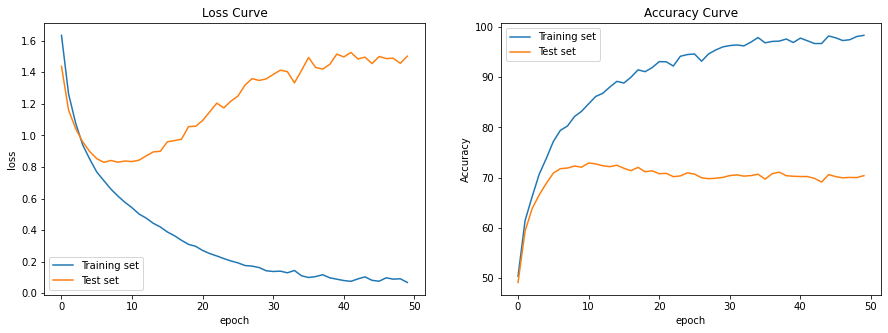

In [12]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_B))
    A_test.append(test_accuracy(model_B))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config2_model_B.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [13]:
model_B.modules

<bound method Module.modules of ConvNeuralNet_B(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25600, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

### Model C

In [14]:
# Creating a CNN class
class ConvNeuralNet_C(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_C, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 3, stride = 1)
        self.fc1 = nn.Linear(14*14*24, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [15]:
model_C = ConvNeuralNet_C(num_classes)
model_C.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_C.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.6969
Epoch [2/50], Loss: 1.7747
Epoch [3/50], Loss: 1.0057
Epoch [4/50], Loss: 1.1025
Epoch [5/50], Loss: 1.0696
Epoch [6/50], Loss: 1.3004
Epoch [7/50], Loss: 1.4717
Epoch [8/50], Loss: 1.0869
Epoch [9/50], Loss: 1.0174
Epoch [10/50], Loss: 0.8995
Epoch [11/50], Loss: 0.6239
Epoch [12/50], Loss: 1.2359
Epoch [13/50], Loss: 1.1453
Epoch [14/50], Loss: 0.7219
Epoch [15/50], Loss: 0.4429
Epoch [16/50], Loss: 1.9169
Epoch [17/50], Loss: 1.2149
Epoch [18/50], Loss: 0.9133
Epoch [19/50], Loss: 0.8480
Epoch [20/50], Loss: 1.2226
Epoch [21/50], Loss: 0.5876
Epoch [22/50], Loss: 1.4706
Epoch [23/50], Loss: 1.1127
Epoch [24/50], Loss: 0.7125
Epoch [25/50], Loss: 1.1989
Epoch [26/50], Loss: 0.7093
Epoch [27/50], Loss: 0.4921
Epoch [28/50], Loss: 0.4333
Epoch [29/50], Loss: 0.8987
Epoch [30/50], Loss: 1.0452
Epoch [31/50], Loss: 1.0195
Epoch [32/50], Loss: 1.6102
Epoch [33/50], Loss: 0.6298
Epoch [34/50], Loss: 0.9045
Epoch [35/50], Loss: 0.7397
Epoch [36/50], Loss: 1.1417
E

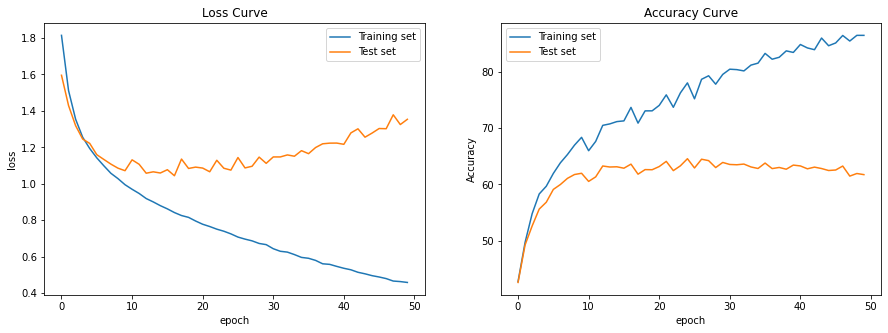

In [16]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_C))
    A_test.append(test_accuracy(model_C))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config2_model_C.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))


In [17]:
model_C.modules

<bound method Module.modules of ConvNeuralNet_C(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4704, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

# Training Models with configuration 3

## Model A

In [9]:
# Creating a CNN class
class ConvNeuralNet_A(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_A, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        self.fc1 = nn.Linear(11*11*24, num_classes)
#         self.relu1 = nn.ReLU()
#         self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
#         out = self.relu1(out)
#         out = self.fc2(out)
        return out

In [10]:
model_A = ConvNeuralNet_A(num_classes)
model_A.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_A.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.7162
Epoch [2/50], Loss: 1.6299
Epoch [3/50], Loss: 1.0360
Epoch [4/50], Loss: 1.4320
Epoch [5/50], Loss: 1.1204
Epoch [6/50], Loss: 1.6931
Epoch [7/50], Loss: 1.0628
Epoch [8/50], Loss: 1.1342
Epoch [9/50], Loss: 1.6844
Epoch [10/50], Loss: 1.1584
Epoch [11/50], Loss: 1.0178
Epoch [12/50], Loss: 1.2707
Epoch [13/50], Loss: 1.1078
Epoch [14/50], Loss: 1.3423
Epoch [15/50], Loss: 0.9498
Epoch [16/50], Loss: 1.1027
Epoch [17/50], Loss: 1.4558
Epoch [18/50], Loss: 1.1807
Epoch [19/50], Loss: 1.5387
Epoch [20/50], Loss: 1.4819
Epoch [21/50], Loss: 0.8524
Epoch [22/50], Loss: 2.0073
Epoch [23/50], Loss: 1.2768
Epoch [24/50], Loss: 1.0232
Epoch [25/50], Loss: 1.2992
Epoch [26/50], Loss: 1.1216
Epoch [27/50], Loss: 1.0485
Epoch [28/50], Loss: 1.0146
Epoch [29/50], Loss: 0.7060
Epoch [30/50], Loss: 1.3827
Epoch [31/50], Loss: 1.2253
Epoch [32/50], Loss: 0.8902
Epoch [33/50], Loss: 1.1872
Epoch [34/50], Loss: 0.6910
Epoch [35/50], Loss: 1.3589
Epoch [36/50], Loss: 1.3785
E

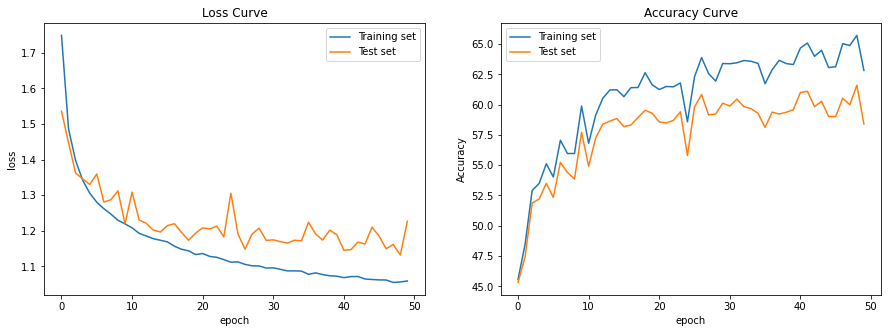

In [11]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_A(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_A))
    A_test.append(test_accuracy(model_A))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config3_model_A.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [12]:
model_A.modules

<bound method Module.modules of ConvNeuralNet_A(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2904, out_features=10, bias=True)
)>

### Model B

In [9]:
# Creating a CNN class
class ConvNeuralNet_B(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_B, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        
        self.fc1 = nn.Linear(18*18*64, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [10]:
model_B = ConvNeuralNet_B(num_classes)
model_B.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_B.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [11]:
# # We use the pre-defined number of epochs to determine how many iterations to train the network on
# for epoch in range(num_epochs):
# 	#Load in the data in batches using the train_loader object
#     for i, (images, labels) in enumerate(train_loader):  
#         # Move tensors to the configured device
#         images = images.to(device)
#         labels = labels.to(device)
        
#         # Forward pass
#         outputs = model_B(images)
#         loss = criterion(outputs, labels)
        
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))


Epoch [1/50], Loss: 1.5641
Epoch [2/50], Loss: 1.1632
Epoch [3/50], Loss: 1.0125
Epoch [4/50], Loss: 0.6414
Epoch [5/50], Loss: 0.6497
Epoch [6/50], Loss: 1.1194
Epoch [7/50], Loss: 1.0660
Epoch [8/50], Loss: 0.4246
Epoch [9/50], Loss: 0.9191
Epoch [10/50], Loss: 0.9212
Epoch [11/50], Loss: 1.4056
Epoch [12/50], Loss: 0.7481
Epoch [13/50], Loss: 1.2862
Epoch [14/50], Loss: 0.5925
Epoch [15/50], Loss: 0.8993
Epoch [16/50], Loss: 1.0140
Epoch [17/50], Loss: 0.3161
Epoch [18/50], Loss: 0.8250
Epoch [19/50], Loss: 0.6075
Epoch [20/50], Loss: 0.2198
Epoch [21/50], Loss: 0.4968
Epoch [22/50], Loss: 0.6105
Epoch [23/50], Loss: 0.9106
Epoch [24/50], Loss: 1.6980
Epoch [25/50], Loss: 0.2998
Epoch [26/50], Loss: 0.4839
Epoch [27/50], Loss: 0.8305
Epoch [28/50], Loss: 1.1097
Epoch [29/50], Loss: 0.9774
Epoch [30/50], Loss: 0.8650
Epoch [31/50], Loss: 1.1733
Epoch [32/50], Loss: 1.3060
Epoch [33/50], Loss: 0.9791
Epoch [34/50], Loss: 1.0698
Epoch [35/50], Loss: 0.7855
Epoch [36/50], Loss: 1.9256
E

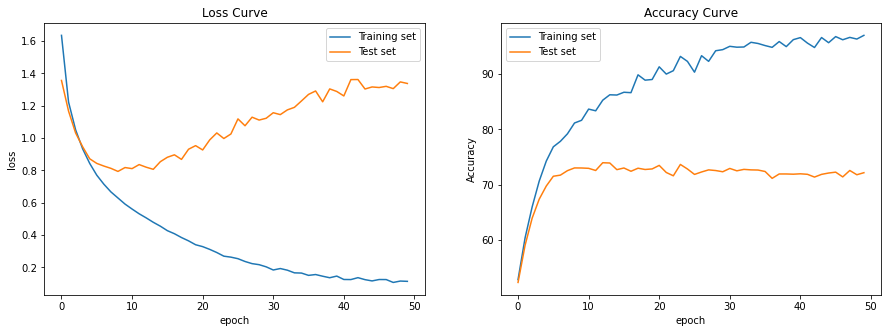

In [12]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_B(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_B))
    A_test.append(test_accuracy(model_B))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config3_model_B.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))

In [13]:
model_B.modules

<bound method Module.modules of ConvNeuralNet_B(
  (conv_layer1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv_layer4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=20736, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>

### Model C

In [14]:
# Creating a CNN class
class ConvNeuralNet_C(nn.Module):
	#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet_C, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=7)
#         self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        
        self.conv_layer2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
#         self.conv_layer2 = nn.Conv2d(in_channels=, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        self.conv_layer3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3)
        self.max_pool3 = nn.MaxPool2d(kernel_size = 4, stride = 1)
        self.fc1 = nn.Linear(11*11*24, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.max_pool2(out)
        
        out = self.conv_layer3(out)
        out = self.max_pool3(out)
        
#         out = self.conv_layer2(out)
        
        
#         out = self.conv_layer3(out)
#         out = self.conv_layer4(out)
#         out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [15]:
model_C = ConvNeuralNet_C(num_classes)
model_C.to(device)
# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model_C.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

Epoch [1/50], Loss: 1.4274
Epoch [2/50], Loss: 1.6189
Epoch [3/50], Loss: 0.9908
Epoch [4/50], Loss: 1.2325
Epoch [5/50], Loss: 0.8829
Epoch [6/50], Loss: 1.6904
Epoch [7/50], Loss: 1.0879
Epoch [8/50], Loss: 1.1203
Epoch [9/50], Loss: 0.8325
Epoch [10/50], Loss: 1.6702
Epoch [11/50], Loss: 1.2759
Epoch [12/50], Loss: 1.2662
Epoch [13/50], Loss: 0.8673
Epoch [14/50], Loss: 0.9961
Epoch [15/50], Loss: 1.1026
Epoch [16/50], Loss: 1.9576
Epoch [17/50], Loss: 0.9629
Epoch [18/50], Loss: 0.5970
Epoch [19/50], Loss: 0.9659
Epoch [20/50], Loss: 1.0759
Epoch [21/50], Loss: 1.7715
Epoch [22/50], Loss: 0.9711
Epoch [23/50], Loss: 1.3201
Epoch [24/50], Loss: 0.8437
Epoch [25/50], Loss: 1.0069
Epoch [26/50], Loss: 0.6236
Epoch [27/50], Loss: 1.0288
Epoch [28/50], Loss: 1.4606
Epoch [29/50], Loss: 1.2583
Epoch [30/50], Loss: 0.7376
Epoch [31/50], Loss: 1.1627
Epoch [32/50], Loss: 0.6588
Epoch [33/50], Loss: 0.7629
Epoch [34/50], Loss: 1.1589
Epoch [35/50], Loss: 0.8244
Epoch [36/50], Loss: 1.6172
E

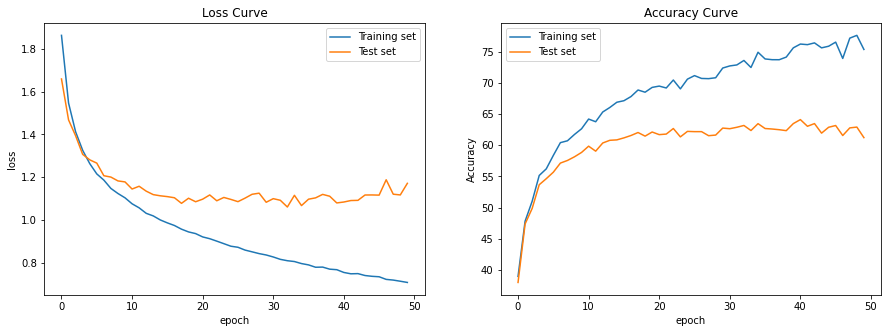

In [16]:
%%time

import matplotlib.pyplot as plt

# We use the pre-defined number of epochs to determine how many iterations to train the network on
loss_train = []
loss_test = []
A_train = []
A_test = []
for epoch in range(num_epochs):
	#Load in the data in batches using the train_loader object
    l_train = 0
    samples = 0
    for i, (images, labels) in enumerate(train_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_train += loss
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l_train /=  samples
    loss_train.append(float(l_train.cpu().detach().numpy()))
    
    l_test = 0
    samples = 0
    for i, (images, labels) in enumerate(test_loader): 
        samples += 1
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model_C(images)
        loss = criterion(outputs, labels)
        l_test += loss
#         # Backward and optimize
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    l_test /=  samples
    loss_test.append(float(l_test.cpu().detach().numpy()))
    
    A_train.append(train_accuracy(model_C))
    A_test.append(test_accuracy(model_C))
    
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    
plt.figure(figsize = (15,5))    
plt.subplot(1,2,1)
plt.plot(loss_train, label = "Training set")
plt.plot(loss_test, label = "Test set")
plt.title("Loss Curve")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(A_train, label = "Training set")
plt.plot(A_test, label = "Test set")
plt.title("Accuracy Curve")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.savefig("config3_model_C.jpg")
    
#     for i, 
        

    
#     print(f"Accuracy after {epoch  +1} :")
#     print(f"Train set: {train_accuracy(model_A)}")
# print(test_accuracy(model_A))


In [17]:
model_C.modules

<bound method Module.modules of ConvNeuralNet_C(
  (conv_layer1): Conv2d(3, 6, kernel_size=(7, 7), stride=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1))
  (max_pool3): MaxPool2d(kernel_size=4, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2904, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>